
# Elipsoides sobre el ajuste de mezcla de gaussianas. 


- Ploteamos los elipsoides de confianza calculados  por Expectation Maximization (``GaussianMixture`` class) ajustados a datos simulados con una mezcla de dos Gaussianas.







- El modelo Expectation Maximization va a usar necesariamente k componentes prefijadas. 



- Aqui podemos ver que el modelo Expectation Maximization depende del numero correcto de gaussianas en la Mezcla. Si le decimos que k=2, encuentra las Gaussianas.

- Si le decimos que k=3 o k=5, el ajuste parte los datos en los clusters necesarios para ajustarse a ese dato

-  Para calcular esta figura realizamos el siguiente codigo:

    - Cargamos el modulo mixture de sklearn
    - definimos los colores con los que vamos a marcar los datos aprendidos.


In [3]:
%matplotlib inline
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['limegreen', 'orchid', 'aqua','violet', 'magenta', 'deeppink','crimson', 'fuchsia', 'blue'])




- Esta funcion va a armar un elipsoide de confianza usando los ejes de la matriz de covarianza estimada para la mezcla
- Arma los paneles de la figura

In [4]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(3, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)



- Aqui simulamos 500 muestras de dos componentes normales mezcladas 

In [5]:

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]




- Se calculan los parámetros de la mezcla y se plotean de acuerdo a la prediccion de etiqueta que hace el mismo método. 


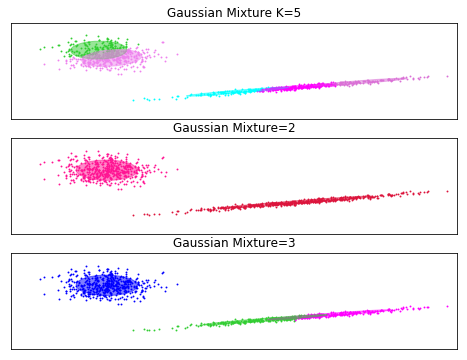

In [6]:

# Fit a Gaussian mixture with EM using five components
gmm2 = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plt.figure(figsize=(8,6))
plot_results(X, gmm2.predict(X), gmm2.means_, gmm2.covariances_, 0,'Gaussian Mixture K=5')

# Fit a Dirichlet process Gaussian mixture using five components
#dpgmm = mixture.BayesianGaussianMixture(n_components=5,covariance_type='full').fit(X)

#plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 0,'Bayesian Gaussian Mixture')


# Fit a Gaussian mixture with EM using 2 components
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 1,'Gaussian Mixture=2')

# Fit a Gaussian mixture with EM using 3 components
gmm1 = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm1.predict(X), gmm1.means_, gmm1.covariances_, 2,'Gaussian Mixture=3')


#plt.savefig('gaussian_mixtureK', dpi=300)
plt.show()